<a href="https://colab.research.google.com/github/PhiWhyyy/E-Commerce-Business-Analysis/blob/main/E_Commerce_Business_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
df= pd.read_excel("/content/E-Commerce.xlsx")
df.head()

,item.category,subcategory,brand,price,rating
0,electronics,mobiles accessories,Autosun,900,4.4
1,electronics,mobiles accessories,iCase,700,4.7
2,electronics,mobiles accessories,13tech,600,4.5
3,electronics,mobiles accessories,Portronics,300,4.4
4,electronics,computers accessories,SNDIA,1000,4.5


In [4]:
# Group by 'item.category' and find the row with the maximum price in each group
costliest_brands = df.loc[df.groupby('item.category')['price'].idxmax()]

# Select only the relevant columns for display
display(costliest_brands[['item.category', 'brand', 'price']])

,item.category,brand,price
25,Clothing,Manyavar,2000
7,electronics,Apple,5000
18,furniture,Afydecor,90000


In [5]:
most_budget_friendly_brands= df.loc[df.groupby("item.category")["price"].idxmin()]
display(most_budget_friendly_brands[["item.category","brand","price"]])

,item.category,brand,price
28,Clothing,Superdeal,400
3,electronics,Portronics,300
19,furniture,FurnitureKraft,5000


In [6]:
df=pd.read_excel("/content/XYZ company dataset_Updated Ecommerce Sheet.xlsx")
Costlient_brands=df.loc[df.groupby("Product")["Unit_Price"].idxmax()]
display(Costlient_brands[["Product","Unit_Price","Total_Value"]])

,Product,Unit_Price,Total_Value
51,Bed,49000,49000
75,Bookshelf,13500,13500
76,Camera,35000,70000
67,Chair,3400,13600
23,Coffee Table,7500,15000
3,Dining Table,16000,48000
68,Gaming Console,43000,43000
4,Headphones,4000,16000
2,Laptop,72000,72000
83,Product,Unit_Price,Total_Value


In [7]:
display(df.columns)

Index(['Order_ID', 'Order_Date', 'Category', 'Product', 'Quantity',
       'Unit_Price', 'Total_Value', 'Payment_Method', 'City', 'Status'],
      dtype='object')

In [8]:
df=pd.read_excel("/content/XYZ company dataset_Updated Ecommerce Sheet.xlsx")
Affordable_brands=df.loc[df.groupby("Product")["Unit_Price"].idxmin()]
display(Affordable_brands[["Product","Unit_Price","Total_Value"]])

,Product,Unit_Price,Total_Value
65,Bed,44000,88000
27,Bookshelf,11000,22000
16,Camera,25000,50000
21,Chair,2800,11200
35,Coffee Table,6800,13600
41,Dining Table,13500,13500
12,Gaming Console,40000,40000
32,Headphones,3500,10500
14,Laptop,68000,68000
83,Product,Unit_Price,Total_Value


In [9]:
delivered_df = df[df['Status'] == 'Delivered']
Affordable_brands = delivered_df.loc[delivered_df.groupby("Product")["Unit_Price"].idxmin()]
display(Affordable_brands[["Product","Unit_Price","Total_Value"]])

,Product,Unit_Price,Total_Value
65,Bed,44000,88000
27,Bookshelf,11000,22000
16,Camera,25000,50000
53,Chair,2900,14500
13,Coffee Table,7000,14000
61,Dining Table,14500,14500
12,Gaming Console,40000,40000
32,Headphones,3500,10500
48,Laptop,68000,68000
40,Smartphone,21000,21000


In [10]:
df['Total_Value'] = pd.to_numeric(df['Total_Value'], errors='coerce')
Total_Sales = df['Total_Value'].sum()
print(f"Total Sales: {Total_Sales}")

Total Sales: 3312100.0


In [11]:
high_value_sales_df = df[(df['Total_Value'] > 50000) & (df['Status'] == 'Delivered')]
High_Value_Sales = high_value_sales_df['Total_Value'].sum()
print(f"High Value Sales (Delivered): {High_Value_Sales}")

High Value Sales (Delivered): 1236000.0


In [12]:
!pip install pandasql
import pandasql as pdsql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=72d022cfd681f256496dd65e59237f79c9d9f0384141f8df19b2bc7ede6a42c5
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


In [13]:
# SQL query to calculate total revenue per category
query_category_revenue = """
SELECT Category, SUM(Total_Value) AS Total_Revenue
FROM df
GROUP BY Category
ORDER BY Total_Revenue DESC;
"""
category_revenue = pdsql.sqldf(query_category_revenue, globals())
display(category_revenue)

query_monthly_sales = """
SELECT strftime('%Y-%m', Order_Date) AS Month, SUM(Total_Value) AS Monthly_Revenue
FROM df
GROUP BY Month
ORDER BY Month;
"""
monthly_sales = pdsql.sqldf(query_monthly_sales, globals())
display(monthly_sales)

,Category,Total_Revenue
0,Electronics,1796600.0
1,Furniture,1515500.0
2,Category,NaN


,Month,Monthly_Revenue
0,None,NaN
1,2022-01,120000.0
2,2022-02,53000.0
3,2022-03,31000.0
4,2022-04,83500.0
5,2022-05,110700.0
6,2022-06,32000.0
7,2022-07,111000.0
8,2022-08,46600.0
9,2022-09,110800.0


In [19]:
# SQL query to count orders by category and status
query_category_status = """
SELECT Category, Status, COUNT(Status) AS Total_Status
FROM df
GROUP BY Category, Status
ORDER BY Category, Status;
"""
category_status = pdsql.sqldf(query_category_status, globals())
display(category_status)

,Category,Status,Total_Status
0,Category,Status,1
1,Electronics,Cancelled,3
2,Electronics,Delivered,37
3,Electronics,Returned,3
4,Electronics,Shipped,4
5,Furniture,Cancelled,2
6,Furniture,Delivered,28
7,Furniture,Returned,7
8,Furniture,Shipped,9


In [22]:
query_category_cancelled = """
SELECT Category, COUNT(Status) AS Cancelled_Orders
FROM df
WHERE Status = 'Cancelled'
GROUP BY Category
ORDER BY Category;
"""
category_cancelled = pdsql.sqldf(query_category_cancelled, globals())
display(category_cancelled)

,Category,Cancelled_Orders
0,Electronics,3
1,Furniture,2


In [23]:
#returned parcels
query_category_returned="""
SELECT Category, COUNT(Status) AS Returned_Orders
FROM df
WHERE Status ='Returned'
GROUP BY Category
ORDER BY Category;
"""
category_returned = pdsql.sqldf(query_category_returned, globals())
display(category_returned)

,Category,Returned_Orders
0,Electronics,3
1,Furniture,7


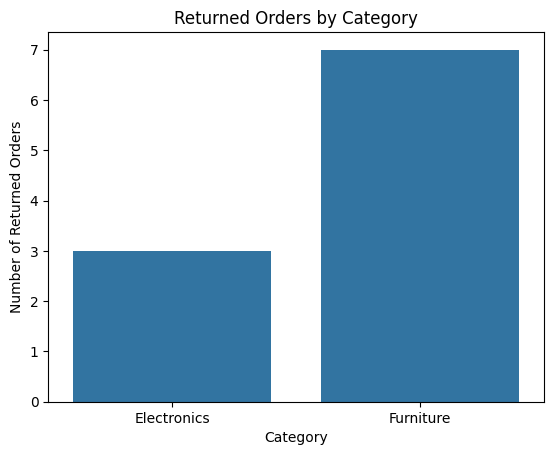

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of returned orders by category
sns.barplot(x='Category', y='Returned_Orders', data=category_returned)
plt.title('Returned Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Returned Orders')
plt.show()

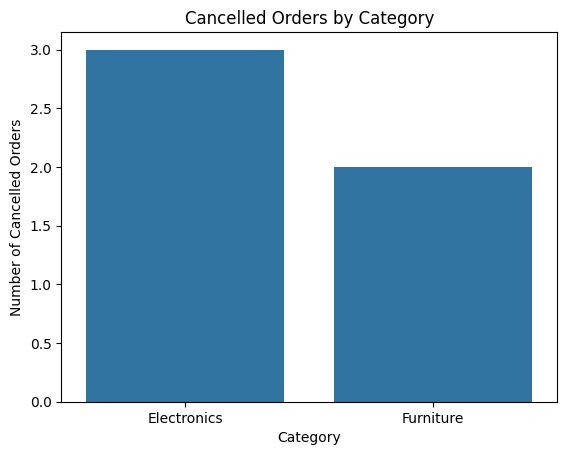

In [29]:
sns.barplot(x='Category', y='Cancelled_Orders', data=category_cancelled)
plt.title('Cancelled Orders by Category')
plt.xlabel('Category')
plt.ylabel('Number of Cancelled Orders')
plt.show()